In [8]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import speclite.filters
from astropy.io import ascii
import stsynphot as stsyn
from astropy.table import Table
from astropy.time import Time
from synphot import Observation
from astropy import units as u
from speclite import filters

# set matplotlib style
# plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

import mejiro
from mejiro.utils import util
from mejiro.instruments.hwo import HWO
from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import SampleBELLS, SampleSL2S, SampleGG

In [16]:
detectors = ['uvis1']  # , 'uvis2'
filtnames = ['F438W', 'F475W', 'F555W', 'F606W', 'F625W', 'F775W', 'F814W']
mjd = '60035'  # April 1st, 2023
# mjd = str(Time.now().mjd)  # Time right now

#Aperture Radius
aper = '6.0'  # 151 pixels (infinity) [default behavior]
#aper = '0.396'              # 10 pixels for UVIS

In [17]:
def build_obsmode(detector, filt, mjd, aper):
    return f'wfc3,{detector},{filt},mjd#{mjd},aper#{aper}'

In [18]:
def calculate_zp_abmag(bp):
    # STMag
    photflam = bp.unit_response(stsyn.conf.area)  # inverse sensitivity in flam
    stmag = -21.1 - 2.5 * np.log10(photflam.value)

    # Pivot Wavelength and bandwidth
    photplam = bp.pivot()  # pivot wavelength in angstroms
    bandwidth = bp.photbw()  # bandwidth in angstroms

    # ABMag
    return stmag - 5 * np.log10(photplam.value) + 18.6921

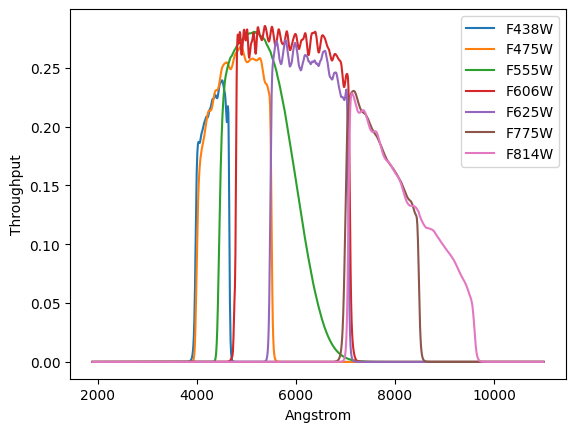

In [19]:
for detector in detectors:
    for filt in filtnames:
        obsmode = build_obsmode(detector, filt.lower(), mjd, aper)
        bp = stsyn.band(obsmode)

        # zp_abmag = calculate_zp_abmag(bp)

        wavelengths = bp.binset
        # print(wavelengths)
        throughput = bp(wavelengths)
        # print(throughput)

        plt.plot(wavelengths.value, throughput.value, label=filt)

plt.xlabel(wavelengths.unit)
plt.ylabel('Throughput')
plt.legend()
plt.show()

In [25]:
for detector in detectors:
    for filt in filtnames:
        obsmode = build_obsmode(detector, filt.lower(), mjd, aper)
        bp = stsyn.band(obsmode)

        zp_abmag = calculate_zp_abmag(bp)

        throughput = bp(wavelengths)
        throughput[-1] = 0.0  # Ensure the last value is zero

        uvis = filters.FilterResponse(
            wavelength=bp.binset,
            response=throughput,
            meta={
                'group_name': 'WFC3_UVIS',
                'band_name': filt
            }
        )
        uvis_name = uvis.save(os.path.join(os.path.dirname(mejiro.__file__), 'data', 'hst_filter_response'))
        print(f'Saved {uvis_name} for {detector} {filt}')

Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F438W.ecsv for uvis1 F438W
Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F475W.ecsv for uvis1 F475W
Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F555W.ecsv for uvis1 F555W
Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F606W.ecsv for uvis1 F606W
Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F625W.ecsv for uvis1 F625W
Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F775W.ecsv for uvis1 F775W
Saved /grad/bwedig/mejiro/mejiro/data/hst_filter_response/WFC3_UVIS-F814W.ecsv for uvis1 F814W
